# Proje ve Veri Hakkında


## Ön Bilgi

>İBB tarafından halka açık olarak paylaşılan meteoroloji verilerinde sıcaklık, nem, rüzgar, rüzgar yönü, yağış, yol sıcaklığı ve hissedilen sıcaklığa dair ortalama - minimum - maksimum ölçümleri ve bununla beraber ölçümlere ait tarih ve konum bilgileri bulunmakta. 

>Düşüncem şu şekilde idi: "Acaba bu farklı ölçümlerden bir kaç tanesini özellik olarak seçerek, hedef olarak hissedilen sıcaklığı tahmin etmek mümkün müdür?". Yaptığım araştırmalar sonucunda, gerçekte de hissedilen sıcaklık hesabında sıcaklık ve nem değişkenlerinin kullanıldığını öğrendim. Ek olarak, en bilindik hava durumu tahmini araçlarından olan Accu Weather'ın hissedilen sıcaklık tahmini yaparken, başka tahmin yöntemlerine ek olarak sıcaklık, nem, rüzgar hızı, yağış oranı,güneş ışını miktarı ve bir takım farklı değişkenleri de dahil ettiğini öğrendim ve ayrıca Accu Weather markası mevcut en isabetli hissedilen sıcaklık tahminini yaptıklarını belirtmekte.

>__Bu çalışmanın amacı ise__ veri setinde bulunan __sıcaklık, nem, rüzgar, yağış__ verilerini kullanarak __hissedilen sıcaklığı__ tahmin etmek üzere bir makine öğrenmesi modeli oluşturmak ve böylelikle hissedilen sıcaklık hesabı formülüne gerek kalmadan, makinenin öğrendiği verileri kullanarak oluşturduğu model ile tahmin yapabilmesi.



### Veri Setinden alınacak özellik ve hedef değişkenleri:

#### Özellikler (features/inputs):

* __Sıcaklık :__ Minimum - maksimum - ortalama sıcaklık ölçümleri içerisinden ``ortalama sıcaklık`` hesaba katılacaktır, ölçülen sıcaklığı _Celsius_ cinsinden belirtir.

* __Nem :__ Minimum - maksimum - ortalama nem ölçümleri içerisinden ``ortalama nem`` hesaba katılacaktır, ölçülen nem oranını (%) belirtmektedir.

* __Rüzgar :__ Minimum - maksimum - ortalama rüzgar ölçümleri içerisinden ``ortalama rüzgar`` hesaba katılacaktır, ölçülen rüzgar hızını km/sa cinsinden belirtmektedir.

* __Yağış :__ Minimum - maksimum - ortalama yağış ölçümleri içerisinden ``ortalama yağış`` hesaba katılacaktır, ölçülen yağış __oranını/beklentisini__ belirtir, yağış __miktarını belirtmez.__

#### Hedef (target/output):

* __Hissedilen Sıcaklık :__ Minimum - maksimum - ortalama hissedilen sıcaklık ölçümleri içerisinden ``ortalama hissedilen sıcaklık`` hesaba katılacaktır, hem veri setinde hem tahmin sonrası hissedilen sıcaklık _Celsius_ cinsindendir.



###### 2020 yılı Ocak, Şubat ve Temmuz aylarına ait meteoroloji verileri kullanıldı.
###### veri seti : https://data.ibb.gov.tr/dataset/meteorology-observation-station-data-set

In [1]:
# Gerekli Kütüphanelerin Yüklenmesi

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")

## 1) Veri Setini Düzenleme ve Temizleme

In [2]:
df = pd.read_csv("ocak.csv")
df.head(3)

,DATE_TIME,OBSERVATORY_NAME,SENSOR_TYPE,MINIMUM_TEMPERATURE,MAXIMUM_TEMPERATURE,AVERAGE_TEMPERATURE,MINIMUM_HUMIDITY,MAXIMUM_HUMIDITY,AVERAGE_HUMIDITY,MINIMUM_WIND,...,AVERAGE_DIRECTIONOFWIND,MINIMUM_PRECIPITATION,MAXIMUM_PRECIPITATION,AVERAGE_PRECIPITATION,MINIMUM_ROAD_TEMPERATURE,MAXIMUM_ROAD_TEMPERATURE,AVERAGE_ROAD_TEMPERATURE,MINIMUM_FELT_TEMPERATURE,MAXIMUM_FELT_TEMPERATURE,AVERAGE_FELT_TEMPERATURE
0,2020-01-15 00:00:00,BEYKOZ_ANADOLU_FENERI,AUTOMATED_WEATHER_SENSOR,6.80,7.00,6.87000,100.00,100.00,100.00000,2.80,...,138.66667,0.0,0.0,0.0,-99.0,-99.0,-99.00000,4.89,5.61,5.27650
1,2020-01-18 09:00:00,ISTOC_MAHMUTBEY,ICING_SENSOR,7.52,8.34,7.92962,70.83,79.85,75.62017,3.17,...,72.03448,0.0,0.0,0.0,12.0,14.7,13.47759,4.99,6.74,5.73224
2,2020-01-08 08:00:00,GUNGOREN_DAVUTPASA_MARMARA,AUTOMATED_WEATHER_SENSOR,4.60,5.10,4.78305,80.00,86.00,84.37288,2.10,...,179.03390,0.0,0.0,0.0,-99.0,-99.0,-99.00000,0.91,3.53,2.09627


In [3]:
#Çok fazla sütun olduğu için sütunların hepsini önizlemede göremiyoruz, sütunların neler olduğuna bakacağız:

df.columns

Index(['DATE_TIME', 'OBSERVATORY_NAME', 'SENSOR_TYPE', 'MINIMUM_TEMPERATURE',
       'MAXIMUM_TEMPERATURE', 'AVERAGE_TEMPERATURE', 'MINIMUM_HUMIDITY',
       'MAXIMUM_HUMIDITY', 'AVERAGE_HUMIDITY', 'MINIMUM_WIND', 'MAXIMUM_WIND',
       'AVERAGE_WIND', 'MINIMUM_DIRECTIONOFWIND', 'MAXIMUM_DIRECTIONOFWIND',
       'AVERAGE_DIRECTIONOFWIND', 'MINIMUM_PRECIPITATION',
       'MAXIMUM_PRECIPITATION', 'AVERAGE_PRECIPITATION',
       'MINIMUM_ROAD_TEMPERATURE', 'MAXIMUM_ROAD_TEMPERATURE',
       'AVERAGE_ROAD_TEMPERATURE', 'MINIMUM_FELT_TEMPERATURE',
       'MAXIMUM_FELT_TEMPERATURE', 'AVERAGE_FELT_TEMPERATURE'],
      dtype='object')

In [4]:
#Çalışmamızda işimize yarayacak verileri çekme:

df = df[["DATE_TIME","OBSERVATORY_NAME","AVERAGE_TEMPERATURE","AVERAGE_HUMIDITY","AVERAGE_WIND","AVERAGE_PRECIPITATION","AVERAGE_FELT_TEMPERATURE"]]
df.head(3)

,DATE_TIME,OBSERVATORY_NAME,AVERAGE_TEMPERATURE,AVERAGE_HUMIDITY,AVERAGE_WIND,AVERAGE_PRECIPITATION,AVERAGE_FELT_TEMPERATURE
0,2020-01-15 00:00:00,BEYKOZ_ANADOLU_FENERI,6.87000,100.00000,3.27667,0.0,5.27650
1,2020-01-18 09:00:00,ISTOC_MAHMUTBEY,7.92962,75.62017,5.05552,0.0,5.73224
2,2020-01-08 08:00:00,GUNGOREN_DAVUTPASA_MARMARA,4.78305,84.37288,4.60847,0.0,2.09627


In [5]:
#Ortalama sıcaklık sütununda küçük bir miktar kayıp veri var, onun dışında sütunların veri tiplerinde herhangi bir sorun 
#veya farklılık gözükmüyor

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53134 entries, 0 to 53133
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DATE_TIME                 53134 non-null  object 
 1   OBSERVATORY_NAME          53134 non-null  object 
 2   AVERAGE_TEMPERATURE       53044 non-null  float64
 3   AVERAGE_HUMIDITY          53134 non-null  float64
 4   AVERAGE_WIND              53134 non-null  float64
 5   AVERAGE_PRECIPITATION     53134 non-null  float64
 6   AVERAGE_FELT_TEMPERATURE  53134 non-null  float64
dtypes: float64(5), object(2)
memory usage: 2.8+ MB


In [6]:
df.rename(columns={"DATE_TIME":"Tarih",
                     "OBSERVATORY_NAME":"Yer",  
                     "AVERAGE_TEMPERATURE":"Sıcaklık",
                     "AVERAGE_HUMIDITY":"Nem",
                     "AVERAGE_WIND":"Rüzgar",
                     "AVERAGE_PRECIPITATION":"Yağış",
                     "AVERAGE_FELT_TEMPERATURE":"Hissedilen Sıcaklık"}, inplace = True)

In [7]:
df.head(3)

,Tarih,Yer,Sıcaklık,Nem,Rüzgar,Yağış,Hissedilen Sıcaklık
0,2020-01-15 00:00:00,BEYKOZ_ANADOLU_FENERI,6.87000,100.00000,3.27667,0.0,5.27650
1,2020-01-18 09:00:00,ISTOC_MAHMUTBEY,7.92962,75.62017,5.05552,0.0,5.73224
2,2020-01-08 08:00:00,GUNGOREN_DAVUTPASA_MARMARA,4.78305,84.37288,4.60847,0.0,2.09627


In [8]:
#Tanımlayıcı istatistikler

df.describe()

,Sıcaklık,Nem,Rüzgar,Yağış,Hissedilen Sıcaklık
count,53044.000000,53134.000000,53134.000000,53134.000000,53134.000000
mean,6.237472,80.738619,-2.280427,-18.641451,-0.610148
std,2.799843,16.860793,23.075747,39.943237,23.978501
min,-5.508330,-99.000000,-99.000000,-99.000000,-99.000000
25%,4.442552,71.311082,1.182050,0.000000,2.313718
50%,6.179870,82.964645,2.284915,0.000000,4.902170
75%,7.995237,93.487615,4.006707,0.000000,7.238290
max,17.692590,100.000000,23.745000,126.559320,19.148000


### Tanımlayıcı İstatistiklerde: 

> __Yağış değişkeninin %25, %50 ve %75 çeyrek ortalamaları 0 olarak gözüküyor__. Bunun sebebi ise yağış oranının çoğu zaman %0 veya %0.3 gibi sıfıra çok yakın değerler alması. Yağış sütunundaki tüm değerler incelendiğinde neredeyse çoğusu 0 olduğundan, çeyrekler hesaplanmaya çalışılınca 0 elde ediliyor fakat bu hatalı bir durum belirtmiyor, anomali tespiti yaparken yağış sütunuyla özel olarak ilgilenmek gerekecek.

> __Nem, Rüzgar, Yağış ve Hissedilen Sıcaklık sütunlarında minimum değer olarak -99__ gözükmekte, İstanbul ilinde Ocak ayında -99 derece sıcaklık hissetmek veya nem - yağış oranlarının -99 olması mümkün değil, aynı şekilde rüzgar hızı da negatif değer alamamakta. Buralarda yüksek ihtimalle hatalı ölçümler yapılmış, anomali tespiti esnasında bunları aykırı değer olarak kabul edip veri setinden sileceğim.

In [9]:
#2923 satırda hissedilen sıcaklık = -99

df[df["Hissedilen Sıcaklık"]<-90]

,Tarih,Yer,Sıcaklık,Nem,Rüzgar,Yağış,Hissedilen Sıcaklık
5,2020-01-15 06:00:00,SILE_DARLIK,4.75833,90.00000,-99.0,-99.0,-99.0
10,2020-01-28 18:00:00,SILE_ISAKOY,4.93333,100.00000,-99.0,-99.0,-99.0
26,2020-01-15 07:00:00,SILE_DARLIK,6.06176,90.00000,-99.0,-99.0,-99.0
34,2020-01-18 02:00:00,SILE_DARLIK,4.26230,90.00000,-99.0,-99.0,-99.0
38,2020-01-13 21:00:00,SILE_DARLIK,3.49500,90.00000,-99.0,-99.0,-99.0
...,...,...,...,...,...,...,...
52986,2020-01-20 22:00:00,TERKOS_BARAJI,4.14833,66.11667,-99.0,-99.0,-99.0
53005,2020-01-25 18:00:00,TERKOS_BARAJI,6.90169,88.30508,-99.0,-99.0,-99.0
53016,2020-01-14 19:00:00,PENDIK_OMERL_BARAJI,2.71000,100.00000,-99.0,-99.0,-99.0
53047,2020-01-31 17:00:00,SILE_DARLIK,5.75932,57.32203,-99.0,-99.0,-99.0


In [10]:
#-99 hissedilen sıcaklık veri girişine sahip yerler

df[df["Hissedilen Sıcaklık"]<-90]["Yer"].unique()

array(['SILE_DARLIK', 'SILE_ISAKOY', 'TERKOS_BARAJI', 'USKUDAR_MGM',
       'PENDIK_OMERL_BARAJI', 'KARTAL_U_MUMCU', 'SILIVRI_MGM'],
      dtype=object)

In [11]:
#Yaklaşık 50 bin satırlık veri içerisinden 90 adet veriyi atmak çok büyük bir kayıp değil, bu sebeple eksik verileri sileceğim

df.isna().sum()

Tarih                   0
Yer                     0
Sıcaklık               90
Nem                     0
Rüzgar                  0
Yağış                   0
Hissedilen Sıcaklık     0
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
#Sadece özelliklerden ve hedeften oluşan veri seti

df.drop(["Yer","Tarih"],axis=1,inplace=True)

In [14]:
df.head(3)

,Sıcaklık,Nem,Rüzgar,Yağış,Hissedilen Sıcaklık
0,6.87000,100.00000,3.27667,0.0,5.27650
1,7.92962,75.62017,5.05552,0.0,5.73224
2,4.78305,84.37288,4.60847,0.0,2.09627


## 2) Tek Değişkenli Veri Analizi: Veri Sıklıklarının ve Dağılımlarının İncelenmesi

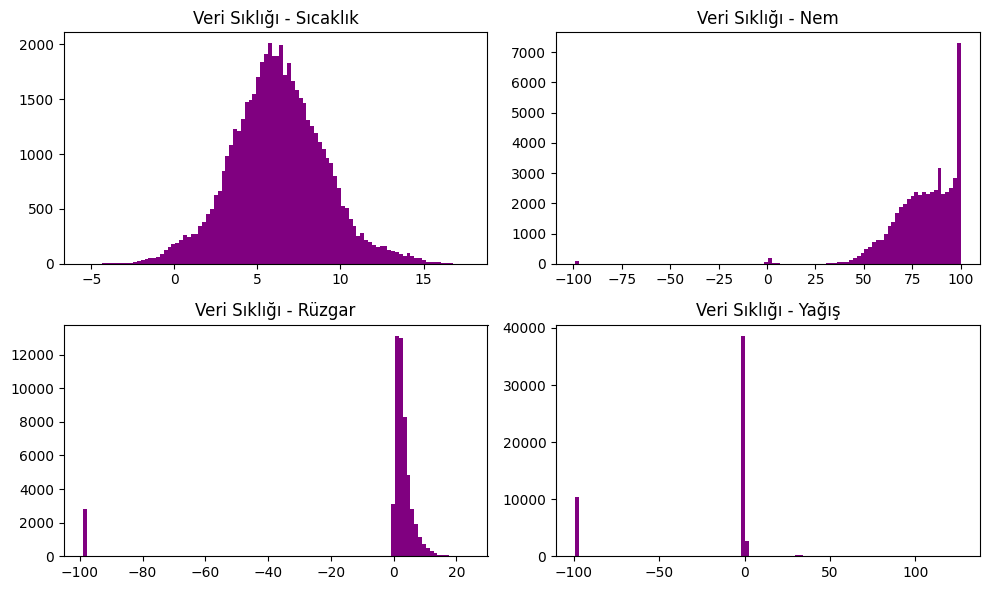

In [15]:
def histPlot(df, degisken):
    fig, axs = plt.subplots(2,2,figsize=(10,6))
    for i in range(0,len(degisken)):
        for j in range (0,len(degisken)):
            axs[i, j].hist(df[degisken[i][j]],bins=100,color="purple")
            axs[i, j].set_title("Veri Sıklığı - {}".format(degisken[i][j]))
            plt.tight_layout()
            
degisken = [["Sıcaklık","Nem"],
           ["Rüzgar","Yağış"]]

histPlot(df, degisken)

#### Sıklık Grafiklerinde:

> Sıcaklık normal dağılım göstermekte. Ocak ayı olduğu için değerler yaklaşık (-5 , 15) derece aralığında değişim göstermekte.

> Nem, Rüzgar, Yağış grafiklerinde yukarıda bahsi geçen ve hatalı olduğunu düşündüğüm __-99__ değerlerinin sıklığı görülebiliyor.

>Yağış grafiğinde görüldüğü üzere, değerlerin çoğunun sıfıra yakın olması ilk, ikinci üçüncü çeyrek hesaplamayı mümkünsüz kılmıştı.

#### Aykırı değerleri grafik üzerinde görebilmek adına kutu grafiklerini inceleyelim:

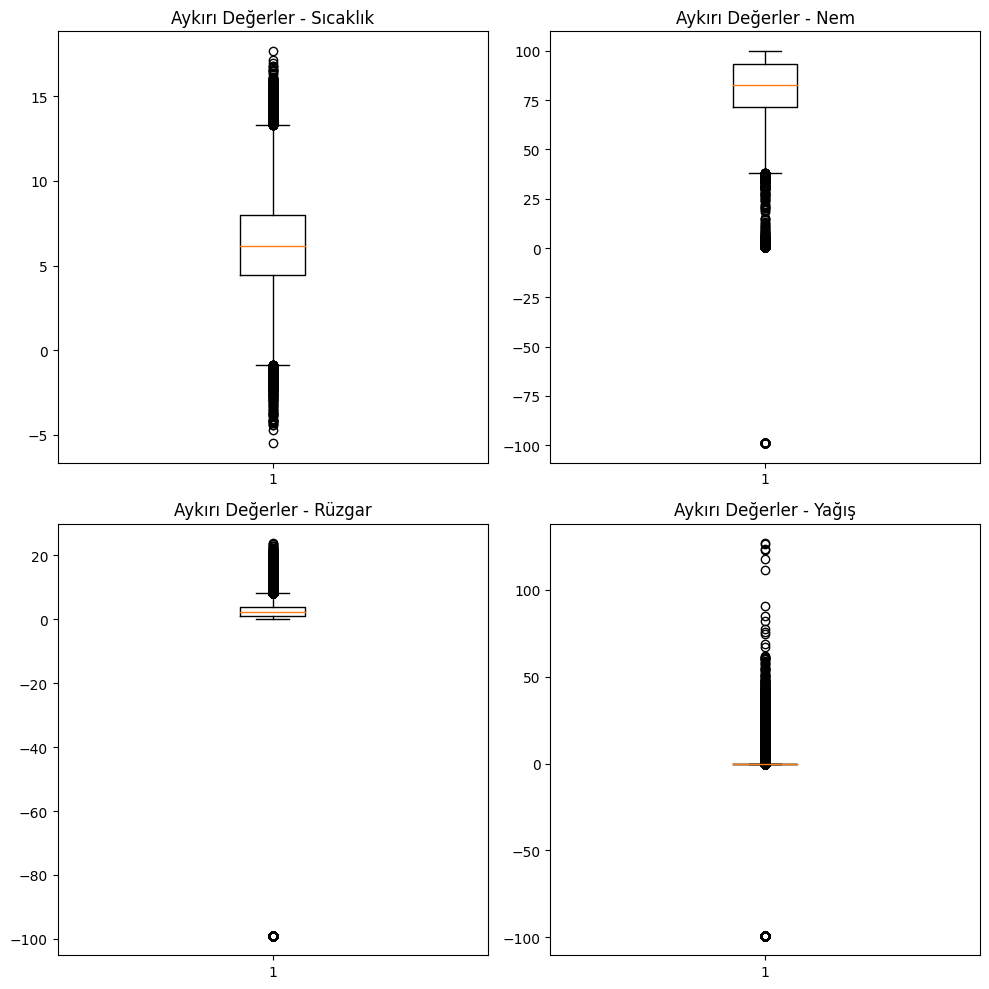

In [16]:
def boxPlot(df, degisken):
    fig, axs = plt.subplots(2,2,figsize=(10,10))
    plt.tight_layout()
    for i in range(0,len(degisken)):
        for j in range (0,len(degisken)):
            axs[i, j].boxplot(df[degisken[i][j]])
            axs[i, j].set_title("Aykırı Değerler - {}".format(degisken[i][j]))
            plt.tight_layout()
            
boxPlot(df, degisken)            

## 3)Anomali Tespiti ve Aykırı Değerlerden Kurtulma

>Aykırı değer tespit etme metodlarından birisi olan IQR metodunu kullanacağım, Q1 ilk çeyrek ve Q3 üçüncü çeyrek olmak üzere:

> __IQR = Q3 - Q1__ çeyrekler açıklığıdır(IQR = interquartile range).

> Metod gereği, ilk çeyrek Q1'in 1.5* IQR aşağısını minimum, üçüncü çeyrek Q3'ün 1.5* IQR yukarısını maksimum kabul edip bu sınırlar dışında kalan değerleri törpülemeye yarayan bir fonksiyon yazacağım.

* IQR metoduna dair görsel açıklama:
![IQR.](https://miro.medium.com/max/9000/1*2c21SkzJMf3frPXPAR_gZA.png)

In [17]:
def anomaliTespit(df, ozellik):
    
    #1.çeyrek
    Q1 = np.percentile(df[ozellik],25)
    #3.çeyrek
    Q3 = np.percentile(df[ozellik],75)
    #IQR = Inter Quartile Range
    IQR = Q3-Q1
    #aykırı değerler için ek adım miktarı
    outlier =1.5*IQR
    #üst ve alt limitler
    ust = Q3 + outlier
    alt = Q1 - outlier
    #alt ve üst limitlerin içinde kalacak şekilde yeni dataframe'i belirle
    df = df[(df[ozellik]>alt) & (df[ozellik]<ust)]

    return df

In [18]:
#Aykırı değerlere sahip orjinal veri seti boyutu
df.shape

(53044, 5)

In [26]:
#Sıcaklıktaki aykırı değerlerden kurtulduktan sonraki veri setinin boyutu
df = anomaliTespit(df, "Sıcaklık")
df.shape

(39376, 5)

In [20]:
#Nemdeki aykırı değerlerden kurtulduktan sonraki veri setinin boyutu
df = anomaliTespit(df,"Nem")
df.shape

(52539, 5)

In [21]:
#Rüzgardaki aykırı değerlerden kurtulduktan sonraki veri setinin boyutu
df = anomaliTespit(df,"Rüzgar")
df.shape

(47028, 5)

In [22]:
#Hissedilen sıcaklıktaki aykırı değerlerden kurtulduktan sonraki veri setinin boyutu
df = anomaliTespit(df,"Hissedilen Sıcaklık")
df.shape

(46478, 5)

> Yağış sütununda değerler birbirine ve sıfıra çok yakın olduğundan çeyrekler açıklığına göre aykırı değer tespiti yapamayacağız, IQR metodu burada bize lazım olan verileri kaybettirir. Onun yerine elle aralık belirleyeceğiz, bunun için yaptığım araştırmalarda yağış oranının en fazla __%100__ en az __%0__ olabileceğini öğrendim. Bu sebeple sütundaki 100'den küçük ve 0'dan büyük verileri alacağız:

In [23]:
#Yağış sütununu sınırladıktan sonraki veri setinin boyutu
df = df[(df["Yağış"]<=100) & (df["Yağış"]>=0)]
df.shape

(39778, 5)

In [27]:
df.min()

Sıcaklık               -0.68391
Nem                    38.18897
Rüzgar                  0.00000
Yağış                   0.00000
Hissedilen Sıcaklık    -3.36183
dtype: float64

> Yukarıda sütunların minimum değerlerinde görüldüğü üzere, aykırı değerlerden ve bunlarla beraber hatalı olarak __-99__ şeklinde girilen verilerden kurtulduk.

In [28]:
df.max()

Sıcaklık                13.28500
Nem                    100.00000
Rüzgar                   8.22000
Yağış                   90.77200
Hissedilen Sıcaklık     13.99557
dtype: float64

>Maksimum değerlere baktığımızda ise uçuk değerlerden kurtulduğumuz,ayrıca nem ve yağış oranlarının %100 sınırını geçmediği görülebilir.

#### Genel olarak:
 * Sıcaklık -0.8 ile 13 derece aralığında
 * Nem 38 ile 100 aralığında
 * Rüzgar 0 ile 8 aralığında
 * Yağış 0 ile 90 aralığında
 * Hissedilen Sıcaklık -3 ile 13.7 derece aralığında 
#### değişmektedir.

## 4) İki Değişkenli Veri Analizi: Özelliklerin Hedef ile İlişkilerinin İncelenmesi

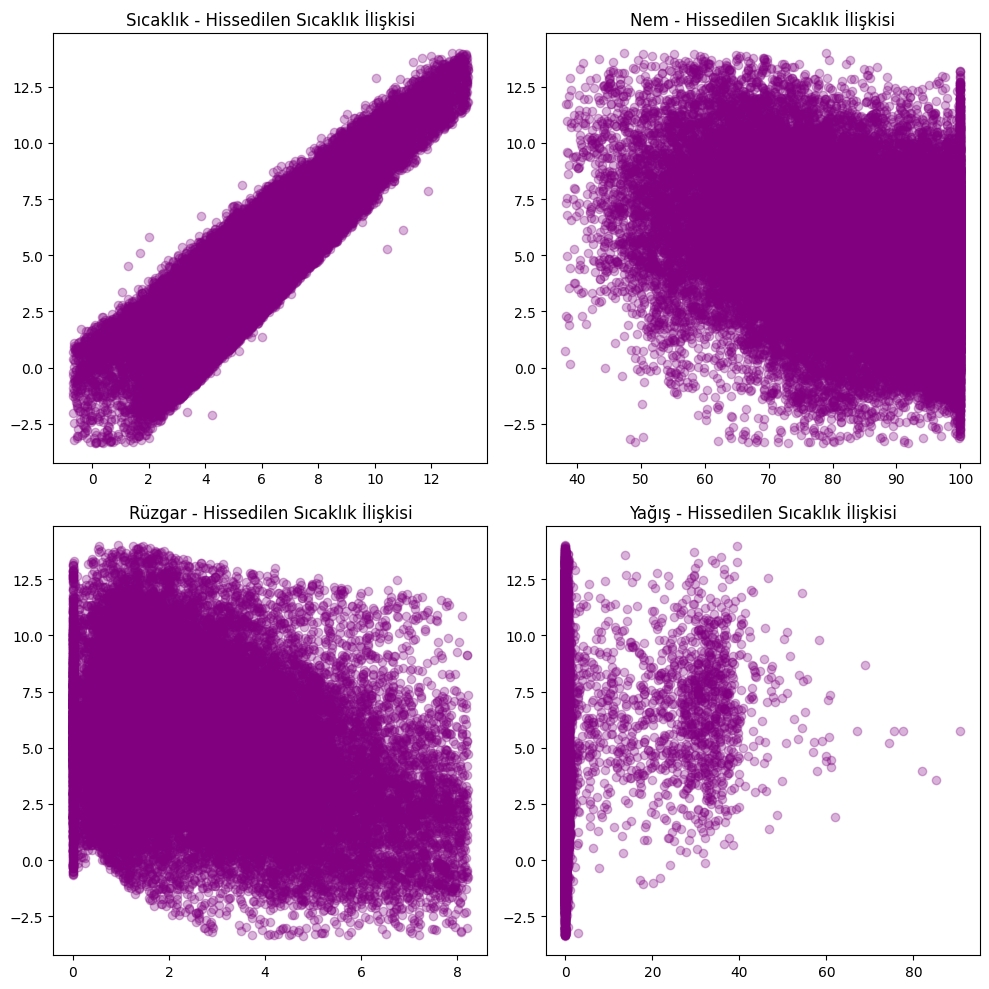

In [29]:
def scatterPlot(df, degisken):
    fig, axs = plt.subplots(2,2,figsize=(10,10))
    plt.tight_layout()
    for i in range(0,len(degisken)):
        for j in range (0,len(degisken)):
            axs[i, j].scatter(df[degisken[i][j]],df["Hissedilen Sıcaklık"],alpha=0.3,color="purple")
            axs[i, j].set_title("{} - Hissedilen Sıcaklık İlişkisi".format(degisken[i][j]))
            plt.tight_layout()
            
scatterPlot(df,degisken)

#### Grafiklerde görüldüğü üzere:

> Sıcaklık ve Hissedilen Sıcaklık pozitif lineer ilişkiye sahip.

> Nem ve Rüzgar ile Hissedilen Sıcaklık arasındaki ilişkide ise, değerler çok dağınık olmasına rağmen negatif bir ilişkinin olduğunu söyleyebiliriz.

> Yağış oranıyla Hissedilen Sıcaklık arasında kuvvetli bir ilişki yok görünüyor.

#### Bu çıkarımları doğrulayacak korelasyon değerlerini matriste görebiliriz:

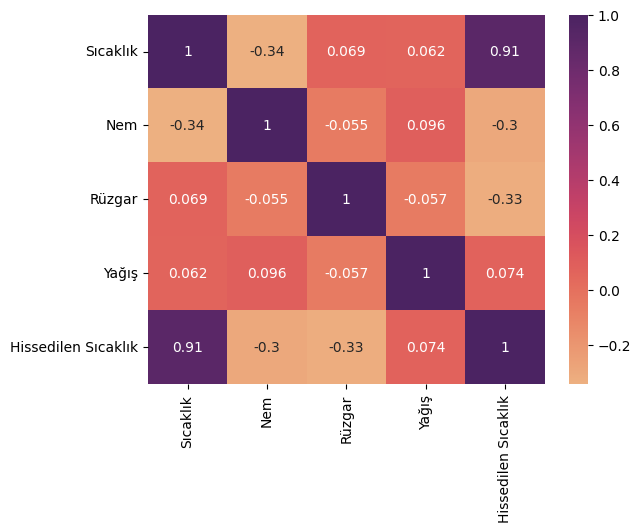

In [30]:
import seaborn as sns

corr_plot = sns.heatmap(df.corr(), cmap="flare", annot=True)

> 0.91 pozitif korelasyon ile en baskın özellik Sıcaklık, sonrasında sırasıyla -0.32 ve -0.3 ile Rüzgar ve Nem negatif ilişkili olarak takip ediyor, Yağış ise 0.073 ile Hissedilen Sıcaklık üzerinde en önemsiz etkiye sahip. 

## 5)  Modelleme ve Tahmin

In [31]:
#Gerekli kütüphaneleri ve kullanılacak algoritmaları import etme

import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [32]:
#x ve y değişkenlerimizi oluşturma

x = df.drop("Hissedilen Sıcaklık",axis=1)

y = df["Hissedilen Sıcaklık"]

print(x.shape, y.shape)

(39376, 4) (39376,)


In [56]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=104,test_size=0.3,shuffle=True)

In [57]:
print(x_train.shape,y_train.shape)

(27563, 4) (27563,)


In [58]:
xgb_reg = xgb.XGBRegressor()

linear = LinearRegression()

In [59]:
xgb_reg.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [60]:
linear.fit(x_train,y_train)

LinearRegression()

In [61]:
print("XGBoost Model training data score = {}".format(xgb_reg.score(x_train,y_train)),
      "  ///  XGBoost Model test data score = {}".format(xgb_reg.score(x_test,y_test)))

XGBoost Model training data score = 0.9971841363977934   ///  XGBoost Model test data score = 0.9947998165172376


In [62]:
print("Linear Model training data score = {}".format(linear.score(x_train,y_train)),
      "  ///  Linear Model test data score = {}".format(linear.score(x_test,y_test)))

Linear Model training data score = 0.9793420142632924   ///  Linear Model test data score = 0.9792265024752235


In [63]:
def kullanıcıTahmin_xgb():
    print("Tahmin için gerekli Sıcaklık, Nem, Rüzgar Hızı, Yağış Oranı değerlerini giriniz")
    a = float(input("Sıcaklık: "))
    b = float(input("Nem Oranı: "))
    c = float(input("Rüzgar Hızı: "))
    d = float(input("Yağış Oranı/Beklentisi: "))
    ozellikler = np.array([[a, b, c, d]])
    e = np.round(xgb_reg.predict(ozellikler)).astype(int)
    print("Hissedilen Sıcaklık = ",*e,"derece")                      

In [64]:
def kullanıcıTahmin_linear():
    print("Tahmin için gerekli Sıcaklık, Nem, Rüzgar Hızı, Yağış Oranı değerlerini giriniz")
    a = float(input("Sıcaklık: "))
    b = float(input("Nem Oranı: "))
    c = float(input("Rüzgar Hızı: "))
    d = float(input("Yağış Oranı/Beklentisi: "))
    ozellikler = np.array([[a, b, c, d]])
    e = np.round(linear.predict(ozellikler)).astype(int)
    print("Hissedilen Sıcaklık = ",*e,"derece")   

### AccuWeather sitesinden aldığım, Ankara hava durumuna ait bazı değerleri deneyeceğim:

##### AccuWeather'a göre [16 42 4 2] değerleri için hissedilen sıcaklık 16 olmalı:

In [65]:
kullanıcıTahmin_xgb()

Tahmin için gerekli Sıcaklık, Nem, Rüzgar Hızı, Yağış Oranı değerlerini giriniz
Sıcaklık: 16
Nem Oranı: 42
Rüzgar Hızı: 4
Yağış Oranı/Beklentisi: 2
Hissedilen Sıcaklık =  13 derece


In [66]:
#Lineer regresyon modeli daha yakın sonuç verdi

kullanıcıTahmin_linear()

Tahmin için gerekli Sıcaklık, Nem, Rüzgar Hızı, Yağış Oranı değerlerini giriniz
Sıcaklık: 16
Nem Oranı: 42
Rüzgar Hızı: 4
Yağış Oranı/Beklentisi: 2
Hissedilen Sıcaklık =  15 derece


##### AccuWeather'a göre [14 45 4 2] değerleri için hissedilen sıcaklık 14 olmalı:

In [67]:
kullanıcıTahmin_xgb()

Tahmin için gerekli Sıcaklık, Nem, Rüzgar Hızı, Yağış Oranı değerlerini giriniz
Sıcaklık: 14
Nem Oranı: 45
Rüzgar Hızı: 4
Yağış Oranı/Beklentisi: 2
Hissedilen Sıcaklık =  13 derece


In [68]:
kullanıcıTahmin_linear()

Tahmin için gerekli Sıcaklık, Nem, Rüzgar Hızı, Yağış Oranı değerlerini giriniz
Sıcaklık: 14
Nem Oranı: 45
Rüzgar Hızı: 4
Yağış Oranı/Beklentisi: 2
Hissedilen Sıcaklık =  13 derece


##### AccuWeather'a göre [7 62 7 4] değerleri için hissedilen sıcaklık 6 olmalı:

In [69]:
#Burada da XGBoost modeli daha yakın sonuç verdi

kullanıcıTahmin_xgb()

Tahmin için gerekli Sıcaklık, Nem, Rüzgar Hızı, Yağış Oranı değerlerini giriniz
Sıcaklık: 7
Nem Oranı: 62
Rüzgar Hızı: 7
Yağış Oranı/Beklentisi: 4
Hissedilen Sıcaklık =  4 derece


In [70]:
kullanıcıTahmin_linear()

Tahmin için gerekli Sıcaklık, Nem, Rüzgar Hızı, Yağış Oranı değerlerini giriniz
Sıcaklık: 7
Nem Oranı: 62
Rüzgar Hızı: 7
Yağış Oranı/Beklentisi: 4
Hissedilen Sıcaklık =  3 derece


##### AccuWeather'a göre [5 81 6 25] değerleri için hissedilen sıcaklık 5 olmalı:

In [71]:
kullanıcıTahmin_xgb()

Tahmin için gerekli Sıcaklık, Nem, Rüzgar Hızı, Yağış Oranı değerlerini giriniz
Sıcaklık: 5
Nem Oranı: 81
Rüzgar Hızı: 6
Yağış Oranı/Beklentisi: 25
Hissedilen Sıcaklık =  2 derece


In [72]:
kullanıcıTahmin_linear()

Tahmin için gerekli Sıcaklık, Nem, Rüzgar Hızı, Yağış Oranı değerlerini giriniz
Sıcaklık: 5
Nem Oranı: 81
Rüzgar Hızı: 6
Yağış Oranı/Beklentisi: 25
Hissedilen Sıcaklık =  2 derece


##### Eğitim veri setinde bulunmayan negatif bir sıcaklık deneyelim, AccuWeather'a göre [-3 80 30 57] değerleri için hissedilen sıcaklık -6 olmalı:

In [73]:
#XGBoost modeli daha yakın bir tahmin yaptı
kullanıcıTahmin_xgb()

Tahmin için gerekli Sıcaklık, Nem, Rüzgar Hızı, Yağış Oranı değerlerini giriniz
Sıcaklık: -3
Nem Oranı: 80
Rüzgar Hızı: 30
Yağış Oranı/Beklentisi: 57
Hissedilen Sıcaklık =  -4 derece


In [74]:
#Lineer regresyon modeli ise çok uzak bir değer tahmin etti

kullanıcıTahmin_linear()

Tahmin için gerekli Sıcaklık, Nem, Rüzgar Hızı, Yağış Oranı değerlerini giriniz
Sıcaklık: -3
Nem Oranı: 80
Rüzgar Hızı: 30
Yağış Oranı/Beklentisi: 57
Hissedilen Sıcaklık =  -23 derece


##### Veri setinde bulunmayan ve makineyi eğitmediğimiz maksimum pozitif değerler [45 30 8 90] denersek: 

In [75]:
kullanıcıTahmin_xgb()

Tahmin için gerekli Sıcaklık, Nem, Rüzgar Hızı, Yağış Oranı değerlerini giriniz
Sıcaklık: 45
Nem Oranı: 30
Rüzgar Hızı: 8
Yağış Oranı/Beklentisi: 90
Hissedilen Sıcaklık =  11 derece


In [76]:
#Eğitilmediği pozitif veride lineer regresyon modeli daha yakın bir tahmin yaptı

kullanıcıTahmin_linear()

Tahmin için gerekli Sıcaklık, Nem, Rüzgar Hızı, Yağış Oranı değerlerini giriniz
Sıcaklık: 45
Nem Oranı: 30
Rüzgar Hızı: 8
Yağış Oranı/Beklentisi: 90
Hissedilen Sıcaklık =  45 derece


> Kullandığım veri seti Ocak ayına ait olduğu için ve sıcaklık ile hissedilen sıcaklık yaklaşık __(-0.8 ile 13)__ arasında değiştiği için, bu değerlerin altındaki veya üzerindeki değerleri tahmin etmek istediğimizde isabetli tahminler yapılmasının, modeller bu durumlara tam uygun olmadığı için mümkün olmayabileceğini farkettim. Bu sebeple veri setine Temmuz ayına dair verileri de ekleyerek ve makineyi daha yüksek sıcaklığın olduğu verilerle de eğiterek pozitif maksimuma yakın sıcaklık değerleri ile daha isabetli tahminler elde edebileceğimi düşünüyorum.

### Başlangıçtaki Ocak ayı verilerine uyguladığım temizlik işlemlerinin aynısı ile temizlediğim Temmuz ayı verilerini okuyup elimdeki veri setine ekleyeceğim:

In [77]:
temmuz = pd.read_csv("temmuz_cleaned.csv")
temmuz.head(3)

,Unnamed: 0,Sıcaklık,Nem,Rüzgar,Yağış,Hissedilen Sıcaklık
0,0,24.36571,87.42857,1.36146,0.00000,26.29536
1,2,24.64373,92.63220,1.73949,0.00000,26.32746
2,3,21.01639,88.66230,0.43639,0.77115,22.28148


In [78]:
temmuz.drop(["Unnamed: 0"],axis=1,inplace=True)

In [79]:
df = df.append(temmuz,ignore_index=True)

In [80]:
df.head(3)

,Sıcaklık,Nem,Rüzgar,Yağış,Hissedilen Sıcaklık
0,6.87000,100.00000,3.27667,0.0,5.27650
1,7.92962,75.62017,5.05552,0.0,5.73224
2,4.78305,84.37288,4.60847,0.0,2.09627


In [81]:
#minimum sıcaklıklarda bir değişim olmadı

df.min()

Sıcaklık               -0.68391
Nem                    26.54167
Rüzgar                  0.00000
Yağış                   0.00000
Hissedilen Sıcaklık    -3.36183
dtype: float64

In [82]:
#Fakat maksimum sıcaklık ve hissedilen sıcaklık değerlerinde artış sağlamış olduk 

df.max()

Sıcaklık                33.22353
Nem                    100.00000
Rüzgar                   8.22000
Yağış                   90.77200
Hissedilen Sıcaklık     34.87373
dtype: float64

In [83]:
x2 = df.drop("Hissedilen Sıcaklık",axis=1)

y2 = df["Hissedilen Sıcaklık"]

print(x2.shape, y2.shape)

(67156, 4) (67156,)


### Ocak ve Temmuz karışımından oluşan bir eğitim seti ile makineyi tekrar eğiteceğim:

In [86]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2,y2,random_state=104,test_size=0.3,shuffle=True)

In [87]:
print(x_train2.shape,y_train2.shape)

(47009, 4) (47009,)


In [88]:
xgb_reg2 = xgb.XGBRegressor()

linear2 = LinearRegression()

In [89]:
xgb_reg2.fit(x_train2,y_train2)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [90]:
linear2.fit(x_train2,y_train2)

LinearRegression()

In [91]:
print("XGBoost Model training data score = {}".format(xgb_reg2.score(x_train2,y_train2)),
      "  ///  XGBoost Model test data score = {}".format(xgb_reg2.score(x_test2,y_test2)))

XGBoost Model training data score = 0.9997536792998015   ///  XGBoost Model test data score = 0.9996236610284395


In [92]:
print("Linear Model training data score = {}".format(linear2.score(x_train2,y_train2)),
      "  ///  Linear Model test data score = {}".format(linear2.score(x_test2,y_test2)))

Linear Model training data score = 0.9952896169596007   ///  Linear Model test data score = 0.995170191650219


In [93]:
def kullanıcıTahmin_2_xgb():
    print("Tahmin için gerekli Sıcaklık, Nem, Rüzgar Hızı, Yağış Oranı değerlerini giriniz")
    a = float(input("Sıcaklık: "))
    b = float(input("Nem Oranı: "))
    c = float(input("Rüzgar Hızı: "))
    d = float(input("Yağış Oranı/Beklentisi: "))
    ozellikler = np.array([[a, b, c, d]])
    e = np.round(xgb_reg2.predict(ozellikler)).astype(int)
    print("Hissedilen Sıcaklık = ",*e,"derece")               

In [94]:
def kullanıcıTahmin_2_linear():
    print("Tahmin için gerekli Sıcaklık, Nem, Rüzgar Hızı, Yağış Oranı değerlerini giriniz")
    a = float(input("Sıcaklık: "))
    b = float(input("Nem Oranı: "))
    c = float(input("Rüzgar Hızı: "))
    d = float(input("Yağış Oranı/Beklentisi: "))
    ozellikler = np.array([[a, b, c, d]])
    e = np.round(linear2.predict(ozellikler)).astype(int)
    print("Hissedilen Sıcaklık = ",*e,"derece")   

##### Veri setinde bulunmayan ve makineyi eğitmediğimiz maksimum pozitif değerler [45 30 8 90] ile tekrar denersek: 

In [95]:
#İlk denemede 11 derece tahmin edilmişti, 33 dereceye yükselmiş
kullanıcıTahmin_2_xgb()

Tahmin için gerekli Sıcaklık, Nem, Rüzgar Hızı, Yağış Oranı değerlerini giriniz
Sıcaklık: 45
Nem Oranı: 30
Rüzgar Hızı: 8
Yağış Oranı/Beklentisi: 90
Hissedilen Sıcaklık =  33 derece


In [96]:
kullanıcıTahmin_2_linear()

Tahmin için gerekli Sıcaklık, Nem, Rüzgar Hızı, Yağış Oranı değerlerini giriniz
Sıcaklık: 45
Nem Oranı: 30
Rüzgar Hızı: 8
Yağış Oranı/Beklentisi: 90
Hissedilen Sıcaklık =  47 derece


> İlk denemeye kıyasla bu yeni Ocak - Temmuz karışımı veri setiyle eğitilen XGBoost modelinde daha yakın tahminler yapabildiğimiz söylenebilir. Pozitif aykırı değerleri tahmin etmede lineer regresyon ile oluşturulan model XGBoost'a kıyasla daha iyi gözüküyor.

##### AccuWeather'a göre [16 42 4 2] değerleri için hissedilen sıcaklık 16 olmalı:

In [97]:
kullanıcıTahmin_2_xgb()

Tahmin için gerekli Sıcaklık, Nem, Rüzgar Hızı, Yağış Oranı değerlerini giriniz
Sıcaklık: 16
Nem Oranı: 42
Rüzgar Hızı: 4
Yağış Oranı/Beklentisi: 2
Hissedilen Sıcaklık =  17 derece


In [98]:
#lineer regresyonda tam isabetli sonuç aldık

kullanıcıTahmin_2_linear()

Tahmin için gerekli Sıcaklık, Nem, Rüzgar Hızı, Yağış Oranı değerlerini giriniz
Sıcaklık: 16
Nem Oranı: 42
Rüzgar Hızı: 4
Yağış Oranı/Beklentisi: 2
Hissedilen Sıcaklık =  16 derece


##### AccuWeather'a göre [14 45 4 2] değerleri için hissedilen sıcaklık 14 olmalı:

In [99]:
kullanıcıTahmin_2_xgb()

Tahmin için gerekli Sıcaklık, Nem, Rüzgar Hızı, Yağış Oranı değerlerini giriniz
Sıcaklık: 14
Nem Oranı: 45
Rüzgar Hızı: 4
Yağış Oranı/Beklentisi: 2
Hissedilen Sıcaklık =  13 derece


In [100]:
kullanıcıTahmin_2_linear()

Tahmin için gerekli Sıcaklık, Nem, Rüzgar Hızı, Yağış Oranı değerlerini giriniz
Sıcaklık: 14
Nem Oranı: 45
Rüzgar Hızı: 4
Yağış Oranı/Beklentisi: 2
Hissedilen Sıcaklık =  13 derece


##### AccuWeather'a göre [7 62 7 4] değerleri için hissedilen sıcaklık 6 olmalı:

In [101]:
kullanıcıTahmin_2_xgb()

Tahmin için gerekli Sıcaklık, Nem, Rüzgar Hızı, Yağış Oranı değerlerini giriniz
Sıcaklık: 7
Nem Oranı: 62
Rüzgar Hızı: 7
Yağış Oranı/Beklentisi: 4
Hissedilen Sıcaklık =  4 derece


In [102]:
kullanıcıTahmin_2_linear()

Tahmin için gerekli Sıcaklık, Nem, Rüzgar Hızı, Yağış Oranı değerlerini giriniz
Sıcaklık: 7
Nem Oranı: 62
Rüzgar Hızı: 7
Yağış Oranı/Beklentisi: 4
Hissedilen Sıcaklık =  4 derece


##### AccuWeather'a göre [5 81 6 25] değerleri için hissedilen sıcaklık 5 olmalı:

In [103]:
kullanıcıTahmin_2_xgb()

Tahmin için gerekli Sıcaklık, Nem, Rüzgar Hızı, Yağış Oranı değerlerini giriniz
Sıcaklık: 5
Nem Oranı: 81
Rüzgar Hızı: 6
Yağış Oranı/Beklentisi: 25
Hissedilen Sıcaklık =  2 derece


In [104]:
kullanıcıTahmin_2_linear()

Tahmin için gerekli Sıcaklık, Nem, Rüzgar Hızı, Yağış Oranı değerlerini giriniz
Sıcaklık: 5
Nem Oranı: 81
Rüzgar Hızı: 6
Yağış Oranı/Beklentisi: 25
Hissedilen Sıcaklık =  2 derece


##### AccuWeather'a göre [-3 80 30 57] değerleri için hissedilen sıcaklık -6 olmalı:

In [105]:
#Negatif sıcaklıklar için XGBoost modeli daha yakın sonuç vermeye devam ediyor

kullanıcıTahmin_2_xgb()

Tahmin için gerekli Sıcaklık, Nem, Rüzgar Hızı, Yağış Oranı değerlerini giriniz
Sıcaklık: -3
Nem Oranı: 80
Rüzgar Hızı: 30
Yağış Oranı/Beklentisi: 57
Hissedilen Sıcaklık =  -4 derece


In [106]:
#negatif değerleri tahmin ederken lineer regresyon pek yakın sonuçlar elde edemiyor

kullanıcıTahmin_2_linear()

Tahmin için gerekli Sıcaklık, Nem, Rüzgar Hızı, Yağış Oranı değerlerini giriniz
Sıcaklık: -3
Nem Oranı: 80
Rüzgar Hızı: 30
Yağış Oranı/Beklentisi: 57
Hissedilen Sıcaklık =  -18 derece


> __Bu sefer de az önceki duruma benzer şekilde modellerin negatif değerleri tahmin etmekte sorun yaşadığını ve daha çok negatif veriye sahip bir set ile eğitilirlerse bu sorunu azaltabileceğimizi düşünmekteyim. Bu sebeple Ocak ayından daha soğuk olan bir ayı bulup o verileri Ocak - Temmuz karışımı veriye ekleyerek, son kez makineyi tekrar eğitip son gözlemlerimi yapacağım.__


### En çok negatif değeri bulabildiğim diğer ay Şubat oldu, benzer şekilde temizlediğim bu ayın verilerini okuyup Ocak - Temmuz karışımı veri setine ekleyeceğim:

In [107]:
subat = pd.read_csv("şubat_cleaned.csv")
subat.head(3)

,Unnamed: 0,Sıcaklık,Nem,Rüzgar,Yağış,Hissedilen Sıcaklık
0,0,8.90556,81.23963,1.42681,0.000,9.34944
1,2,8.51508,89.31148,1.73000,40.825,8.38984
2,3,2.75185,51.90741,1.88333,0.000,1.68704


In [108]:
subat.drop(["Unnamed: 0"],axis=1,inplace=True)

In [109]:
df = df.append(subat,ignore_index=True)
df.head(3)

,Sıcaklık,Nem,Rüzgar,Yağış,Hissedilen Sıcaklık
0,6.87000,100.00000,3.27667,0.0,5.27650
1,7.92962,75.62017,5.05552,0.0,5.73224
2,4.78305,84.37288,4.60847,0.0,2.09627


In [110]:
#Sıcaklığı minimum -4'e, Hissedilen Sıcaklığı ise -5'e çekebildik

df.min()

Sıcaklık               -4.07948
Nem                    25.12645
Rüzgar                  0.00000
Yağış                   0.00000
Hissedilen Sıcaklık    -5.42983
dtype: float64

In [111]:
df.max()

Sıcaklık                33.22353
Nem                    100.00000
Rüzgar                   8.27586
Yağış                   99.55952
Hissedilen Sıcaklık     34.87373
dtype: float64

In [112]:
x3 = df.drop("Hissedilen Sıcaklık",axis=1)

y3 = df["Hissedilen Sıcaklık"]

print(x3.shape, y3.shape)

(106751, 4) (106751,)


### Şubat ayının da eklenmesi ile oluşan karışımdan böldüğüm bir eğitim seti ile makineyi tekrar eğiteceğim:

In [113]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(x3,y3,random_state=104,test_size=0.3,shuffle=True)

In [114]:
print(x_train3.shape,y_train3.shape)

(74725, 4) (74725,)


In [115]:
xgb_reg3 = xgb.XGBRegressor()

linear3 = LinearRegression()

In [116]:
xgb_reg3.fit(x_train3,y_train3)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [117]:
linear3.fit(x_train3,y_train3)

LinearRegression()

In [118]:
print("XGBoost Model training data score = {}".format(xgb_reg3.score(x_train3,y_train3)),
      "  ///  XGBoost Model test data score = {}".format(xgb_reg3.score(x_test3,y_test3)))

XGBoost Model training data score = 0.9996273754782496   ///  XGBoost Model test data score = 0.9995182328175638


In [119]:
print("Linear Model training data score = {}".format(linear3.score(x_train3,y_train3)),
      "  ///  Linear Model test data score = {}".format(linear3.score(x_test3,y_test3)))

Linear Model training data score = 0.9950535527691696   ///  Linear Model test data score = 0.9952114458646493


In [120]:
def kullanıcıTahmin_3_xgb():
    print("Tahmin için gerekli Sıcaklık, Nem, Rüzgar Hızı, Yağış Oranı değerlerini giriniz")
    a = float(input("Sıcaklık: "))
    b = float(input("Nem Oranı: "))
    c = float(input("Rüzgar Hızı: "))
    d = float(input("Yağış Oranı/Beklentisi: "))
    ozellikler = np.array([[a, b, c, d]])
    e = np.round(xgb_reg3.predict(ozellikler)).astype(int)
    print("Hissedilen Sıcaklık = ",*e,"derece")    

In [121]:
def kullanıcıTahmin_3_linear():
    print("Tahmin için gerekli Sıcaklık, Nem, Rüzgar Hızı, Yağış Oranı değerlerini giriniz")
    a = float(input("Sıcaklık: "))
    b = float(input("Nem Oranı: "))
    c = float(input("Rüzgar Hızı: "))
    d = float(input("Yağış Oranı/Beklentisi: "))
    ozellikler = np.array([[a, b, c, d]])
    e = np.round(linear3.predict(ozellikler)).astype(int)
    print("Hissedilen Sıcaklık = ",*e,"derece") 

##### AccuWeather'a göre [16 42 4 2] değerleri için hissedilen sıcaklık 16 olmalı:

In [122]:
#İlk kez XGBoost modeli tam isabetli sonuç verdi

kullanıcıTahmin_3_xgb()

Tahmin için gerekli Sıcaklık, Nem, Rüzgar Hızı, Yağış Oranı değerlerini giriniz
Sıcaklık: 16
Nem Oranı: 42
Rüzgar Hızı: 4
Yağış Oranı/Beklentisi: 2
Hissedilen Sıcaklık =  16 derece


In [123]:
#Lineer regresyon modelindeki isabetli tahmin devam ediyor

kullanıcıTahmin_3_linear()

Tahmin için gerekli Sıcaklık, Nem, Rüzgar Hızı, Yağış Oranı değerlerini giriniz
Sıcaklık: 16
Nem Oranı: 42
Rüzgar Hızı: 4
Yağış Oranı/Beklentisi: 2
Hissedilen Sıcaklık =  16 derece


##### AccuWeather'a göre [14 45 4 2] değerleri için hissedilen sıcaklık 14 olmalı:

In [124]:
#değişiklik yok, aynı tahmin
kullanıcıTahmin_3_xgb()

Tahmin için gerekli Sıcaklık, Nem, Rüzgar Hızı, Yağış Oranı değerlerini giriniz
Sıcaklık: 14
Nem Oranı: 45
Rüzgar Hızı: 4
Yağış Oranı/Beklentisi: 2
Hissedilen Sıcaklık =  13 derece


In [125]:
#değişiklik yok, aynı tahmin
kullanıcıTahmin_3_linear()

Tahmin için gerekli Sıcaklık, Nem, Rüzgar Hızı, Yağış Oranı değerlerini giriniz
Sıcaklık: 14
Nem Oranı: 45
Rüzgar Hızı: 4
Yağış Oranı/Beklentisi: 2
Hissedilen Sıcaklık =  13 derece


##### AccuWeather'a göre [7 62 7 4] değerleri için hissedilen sıcaklık 6 olmalı:

In [126]:
#değişiklik yok, aynı tahmin
kullanıcıTahmin_3_xgb()

Tahmin için gerekli Sıcaklık, Nem, Rüzgar Hızı, Yağış Oranı değerlerini giriniz
Sıcaklık: 7
Nem Oranı: 62
Rüzgar Hızı: 7
Yağış Oranı/Beklentisi: 4
Hissedilen Sıcaklık =  4 derece


In [127]:
#değişiklik yok, aynı tahmin
kullanıcıTahmin_3_linear()

Tahmin için gerekli Sıcaklık, Nem, Rüzgar Hızı, Yağış Oranı değerlerini giriniz
Sıcaklık: 7
Nem Oranı: 62
Rüzgar Hızı: 7
Yağış Oranı/Beklentisi: 4
Hissedilen Sıcaklık =  4 derece


##### AccuWeather'a göre [5 81 6 25] değerleri için hissedilen sıcaklık 5 olmalı:

In [128]:
#değişiklik yok, aynı tahmin
kullanıcıTahmin_3_xgb()

Tahmin için gerekli Sıcaklık, Nem, Rüzgar Hızı, Yağış Oranı değerlerini giriniz
Sıcaklık: 5
Nem Oranı: 81
Rüzgar Hızı: 6
Yağış Oranı/Beklentisi: 25
Hissedilen Sıcaklık =  2 derece


In [129]:
#değişiklik yok, aynı tahmin
kullanıcıTahmin_3_linear()

Tahmin için gerekli Sıcaklık, Nem, Rüzgar Hızı, Yağış Oranı değerlerini giriniz
Sıcaklık: 5
Nem Oranı: 81
Rüzgar Hızı: 6
Yağış Oranı/Beklentisi: 25
Hissedilen Sıcaklık =  2 derece


##### AccuWeather'a göre [-3 80 30 57] değerleri için hissedilen sıcaklık -6 olmalı:

In [130]:
#negatif sıcaklığın olduğu bir tahminde XGBoost modeli tam isabetli sonuç verdi

kullanıcıTahmin_3_xgb()

Tahmin için gerekli Sıcaklık, Nem, Rüzgar Hızı, Yağış Oranı değerlerini giriniz
Sıcaklık: -3
Nem Oranı: 80
Rüzgar Hızı: 30
Yağış Oranı/Beklentisi: 57
Hissedilen Sıcaklık =  -6 derece


In [131]:
#negatif değerlerde lineer regresyon modelinin tutarsızlığı devam ediyor

kullanıcıTahmin_3_linear()

Tahmin için gerekli Sıcaklık, Nem, Rüzgar Hızı, Yağış Oranı değerlerini giriniz
Sıcaklık: -3
Nem Oranı: 80
Rüzgar Hızı: 30
Yağış Oranı/Beklentisi: 57
Hissedilen Sıcaklık =  -19 derece


##### Negatif sıcaklığın olduğu bir tahmin daha yapmak ve XGBoost modelinin tutarlılığına bakmak için, AccuWeather'a göre  

#####  12.12.2022 tarihindeki tahmin olan [-4 40 9 25] değerleri için hissedilen sıcaklığın -7 olması gereken durumu inceleyelim:

In [132]:
#isabetli sonuç

kullanıcıTahmin_3_xgb()

Tahmin için gerekli Sıcaklık, Nem, Rüzgar Hızı, Yağış Oranı değerlerini giriniz
Sıcaklık: -4
Nem Oranı: 40
Rüzgar Hızı: 9
Yağış Oranı/Beklentisi: 25
Hissedilen Sıcaklık =  -7 derece


In [133]:
#Lineer model beklenenden daha yakın bir sonuç verdi

kullanıcıTahmin_3_linear()

Tahmin için gerekli Sıcaklık, Nem, Rüzgar Hızı, Yağış Oranı değerlerini giriniz
Sıcaklık: -4
Nem Oranı: 40
Rüzgar Hızı: 9
Yağış Oranı/Beklentisi: 25
Hissedilen Sıcaklık =  -10 derece


# 6) Sonuç

<div class="alert alert-block alert-info">
<b>Modellerin Karşılaştırılması</b>
    
<div class="alert alert-block alert-success">
<b>XGBoost Regresyon modeli: </b> XGBoost regresyon modelini eğittirken kullandığımız veri çeşitlendikçe, sadece Ocak ayındaki (-0.8 , 13) sıcaklık değerlerinin olduğu aralıktan, Ocak - Şubat - Temmuz karışımı veri setinin sıcaklık aralığı olan (-4 , 33) aralığına ilerlediğimiz süreçte bu model ile yapılan tahminlerin hedefe yakınlığı da iyice arttı. Ayrıca lineer modele kıyasla, negatif uca yakın sıcaklık değerlerinin tahminini gerçek değere daha yakın bir şekilde yapıyor.
</div>
    
<div class="alert alert-block alert-success">
<b>Lineer Regresyon modeli:</b> XGBoost modeline zıt olarak, eğitildiği verinin çeşitliliği daha azken de hedefe yakın tahminler yaptı, ayrıca pozitif uca yakın hatta daha yüksek aykırı sıcaklık değerlerinin tahminini çok daha iyi yaptı. Fakat veri çeşitliliği arttıkça bu durumdan herhangi bir şekilde etkilenmedi, tahmin isabetliliği XGBoost kadar artmadı.
</div>
    
<div class="alert alert-block alert-success">
<b>Karşılaştırmak gerekirse: </b> Verideki çeşitliliğin az olduğu modeller kurarken Lineer model ile, çeşitliliğin ve verinin fazla olduğu modellerde XGBoost ile çalışılabileceği çıkarımı yapılabilir.
</div>
    
<div class="alert alert-block alert-danger">
<b>Eksi Yönler:</b> İki model de, pozitif ve negatif uçlarda yaptıkları isabetli tahminleri dağılımın daha ortasında kalan sıcaklık değerleri için yapamadılar. Bu bölgelerde 1,2 veya 3 derecelik farklar ile tahminlerde bulundular.
</div>